In [1]:
import findspark
findspark.init()

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName("kpk_project").getOrCreate()
spark.sparkContext.setLogLevel("ERROR")

23/01/07 20:10:24 WARN util.Utils: Your hostname, node1 resolves to a loopback address: 127.0.0.1; using 192.168.137.151 instead (on interface ens3)
23/01/07 20:10:24 WARN util.Utils: Set SPARK_LOCAL_IP if you need to bind to another address
23/01/07 20:10:25 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/01/07 20:10:28 WARN util.Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/01/07 20:10:28 WARN util.Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [4]:
df = spark.read.option("header","true").option("inferschema","true").csv("hdfs://localhost:8020/user/kpk/reports/combined_df_20221231.csv/part-00000-0ee01c1f-a8b0-4e4b-88c6-7a1271ed85e3-c000.csv")
   

In [ ]:
df2 = spark.read.option("header","true").option("inferschema","true").csv("hdfs://localhost:8020/user/kpk/spark_analysis/aaa_20221231/part-00000-bdaf617d-95ff-4d37-80d7-9c1cdc147276-c000.csv")
 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df1 = df.toPandas()

/usr/local/spark/python/pyspark/sql/pandas/conversion.py:178: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/usr/local/spark/python/pyspark/sql/pandas/conversion.py:178: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


In [ ]:
df2 = df2.toPandas()

In [25]:
filtered_df = df1[~np.isnan(df1["AvgSpeedLine_mps"])]
filtered_df2 = df2[~np.isnan(df2["AvgSpeed_kmph"])]

In [8]:
df_pom1 = filtered_df2[filtered_df2["coco"]<=2]
df_pom2 = filtered_df2[(filtered_df2["coco"]<=5) & (filtered_df2["coco"]>2)]
df_pom3 = filtered_df2[filtered_df2["coco"]>5]

In [14]:
data = [df_pom1["AvgSpeed_kmph"], df_pom2["AvgSpeed_kmph"], df_pom3["AvgSpeed_kmph"]]

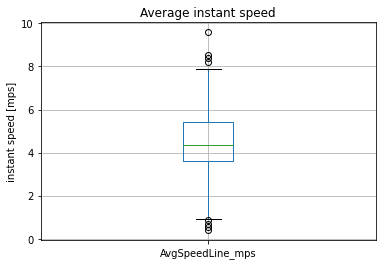

In [15]:
fig, ax1 = plt.subplots()

ax1 = filtered_df.boxplot(column=["AvgSpeedLine_mps"], figsize=(15,5))
ax1.set_title('Average instant speed')
ax1.set_xlabel('')
ax1.set_ylabel('instant speed [mps]')

plt.show()

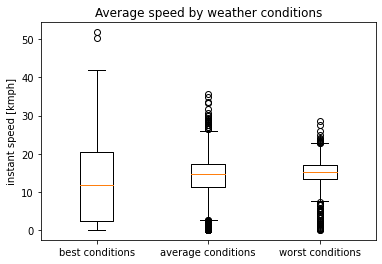

In [16]:
labels = ['best conditions', 'average conditions', 'worst conditions']
plt.boxplot(data, labels=labels) 
plt.ylabel('instant speed [kmph]')
plt.title('Average speed by weather conditions')
plt.show()

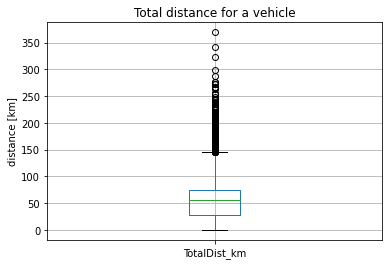

In [19]:
fig, ax1 = plt.subplots()

ax1 = filtered_df2.boxplot(column=["TotalDist_km"], figsize=(15,5))
ax1.set_title('Total distance for a vehicle')
ax1.set_xlabel('')
ax1.set_ylabel('distance [km]')

plt.show()

In [20]:
df_pom4 = filtered_df2.groupby('Lines')['TotalDist_km'].agg(['mean']).reset_index().sort_values(by=['mean'], ascending=False)
df_pom4.head(10)

,Lines,mean
169,733,188.055087
176,743,164.255865
171,736,143.600393
183,L-3,142.989906
119,264,136.499688
210,L40,131.712477
167,730,121.156442
158,719,119.527083
181,L-1,115.605433
152,712,112.140171


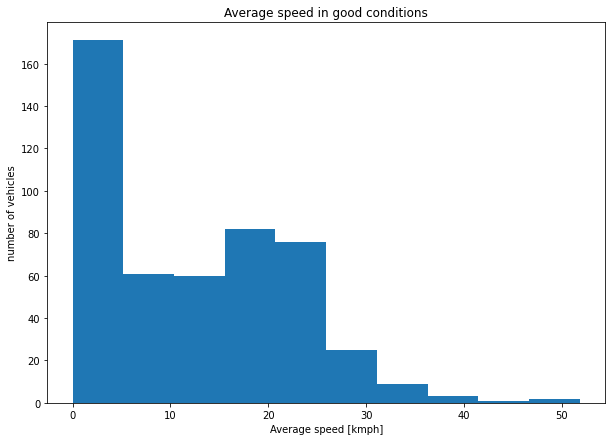

In [29]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df_pom1["AvgSpeed_kmph"])
plt.xlabel("Average speed [kmph]")
plt.ylabel("number of vehicles")
plt.title('Average speed in good conditions')
plt.show()

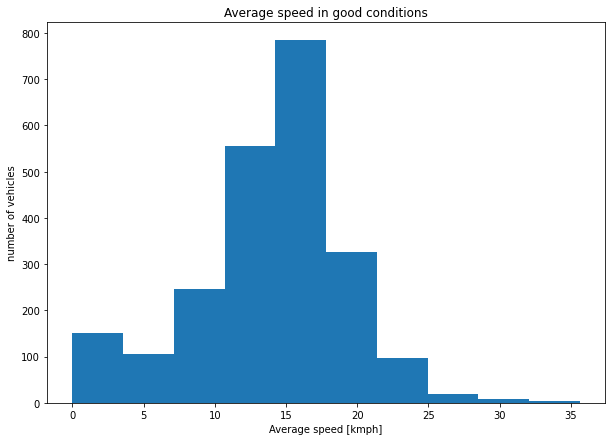

In [30]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df_pom2["AvgSpeed_kmph"])
plt.xlabel("Average speed [kmph]")
plt.ylabel("number of vehicles")
plt.title('Average speed in good conditions')
plt.show()

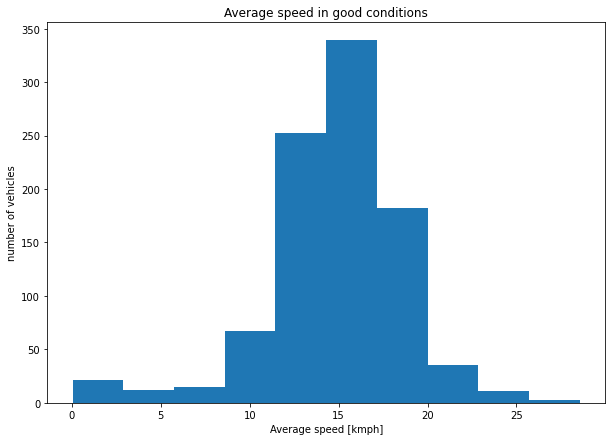

In [31]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df_pom3["AvgSpeed_kmph"])
plt.xlabel("Average speed [kmph]")
plt.ylabel("number of vehicles")
plt.title('Average speed in good conditions')
plt.show()